<a href="https://colab.research.google.com/github/meghajadhav037/Elevate-Lab-Task-3/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing.csv
✅ Dataset loaded successfully.

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

📋 Missing Values:
 price        

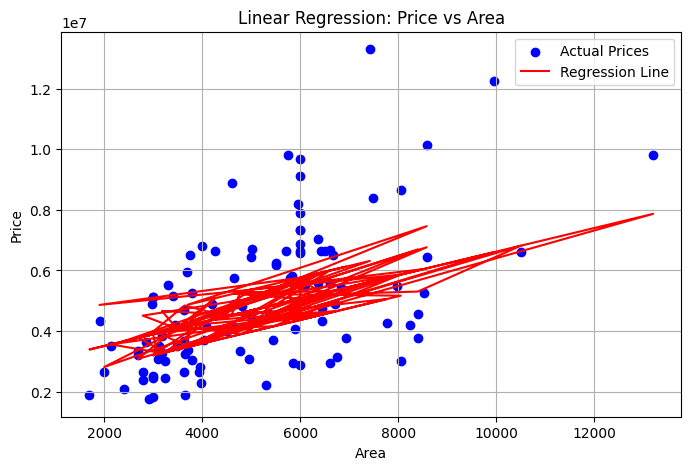


📈 Model Coefficients:
Intercept: 642086.4086518651
area: 389.23
bedrooms: 695678.67


In [3]:
# 🔹 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹 2. Upload File in Google Colab
from google.colab import files
uploaded = files.upload()  # Upload 'Housing.csv' from your computer

# 🔹 3. Load Dataset
df = pd.read_csv('Housing.csv')  # File name must match the uploaded file
print("✅ Dataset loaded successfully.\n")
print(df.head())

# 🔹 4. Preprocess Data
print("\n📋 Missing Values:\n", df.isnull().sum())
df = df.dropna()

# Optional: View Column Names
print("\n📌 Column Names:", df.columns.tolist())

# 🔹 5. Feature Selection
# Update column names here based on your dataset
X = df[['area', 'bedrooms']]  # Independent variables
y = df['price']               # Dependent variable

# 🔹 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 7. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 8. Make Predictions
y_pred = model.predict(X_test)

# 🔹 9. Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 🔹 10. Plot Results (area vs price)
plt.figure(figsize=(8, 5))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['area'], y_pred, color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 11. Interpret Coefficients
print("\n📈 Model Coefficients:")
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")